In [1]:
import psycopg2
import pandas as pd
import numpy as np

from yellowbrick.features import RadViz

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib notebook 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

conn = psycopg2.connect( 
                        host = 'project.cgxhdwn5zb5t.us-east-1.rds.amazonaws.com',
                        port = 5432, 
                        user = 'postgres',
                        password = 'Admin123',
                        database = 'postgres')
cursor = conn.cursor()

In [2]:
DEC2FLOAT = psycopg2.extensions.new_type(
    psycopg2.extensions.DECIMAL.values,
    'DEC2FLOAT',
    lambda value, curs: float(value) if value is not None else None)
psycopg2.extensions.register_type(DEC2FLOAT)

In [3]:
cursor.execute('SELECT * FROM "AHS_Household_Class"')
rows = cursor.fetchall()
col_names = []
for elt in cursor.description:
    col_names.append(elt[0])

df = pd.DataFrame(data=rows, columns=col_names).fillna(0)

In [4]:
df.columns

Index(['index', 'CONTROL', 'YEAR', 'RATINGHS', 'RATINGNH', 'TOTROOMS',
       'PERPOVLVL', 'DINING', 'LAUNDY', 'STORIES', 'HHAGE', 'HHMOVE',
       'PARTNER', 'NUMELDERS', 'NUMADULTS', 'NUMNONREL', 'HHYNGKIDS',
       'HHOLDKIDS', 'NUMVETS', 'NUMYNGKIDS', 'NUMOLDKIDS', 'NUMSUBFAM',
       'NUMSECFAM', 'NUMPEOPLE', 'HHADLTKIDS', 'MULTIGEN', 'UFINROOMS',
       'LOTSIZE', 'FINROOMS', 'UNITSIZE', 'BEDROOMS', 'KITCHENS', 'BATHROOMS',
       'MVG1PER', 'MVG2PER', 'MVG3PER', 'HINCP', 'FINCP', 'ELECAMT', 'GASAMT',
       'OILAMT', 'OTHERAMT', 'TRASHAMT', 'WATERAMT', 'UTILAMT', 'DIVISION',
       'OMB13CBSA', 'BLD', 'HHMAR', 'MILHH', 'HHRACE', 'HHNATVTY', 'HSHLDTYPE',
       'COOKFUEL', 'FIREPLACE', 'NUMHEAR', 'NUMSEE', 'NUMMEMRY', 'NUMWALK',
       'NUMCARE', 'NUMERRND', 'MVG1COST', 'MVG2COST', 'MVG3COST', 'BATHEXCLU',
       'NOSTEP', 'CONDO', 'SEARCHFAM', 'SEARCHLIST', 'SEARCHNET', 'SEARCHOTH',
       'SEARCHPUB', 'SEARCHREA', 'SEARCHSIGN', 'RMCHANGE', 'RMCOMMUTE',
       'RMCOSTS', 'RMFAMI

In [5]:
features = ['TOTROOMS',
       'PERPOVLVL', 'DINING', 'LAUNDY', 'STORIES', 'HHAGE', 'HHMOVE',
       'PARTNER', 'NUMELDERS', 'NUMADULTS', 'NUMNONREL', 'HHYNGKIDS',
       'HHOLDKIDS', 'NUMVETS', 'NUMYNGKIDS', 'NUMOLDKIDS', 'NUMSUBFAM',
       'NUMSECFAM', 'NUMPEOPLE', 'HHADLTKIDS', 'MULTIGEN', 'UFINROOMS',
       'LOTSIZE', 'FINROOMS', 'UNITSIZE', 'BEDROOMS', 'KITCHENS', 'BATHROOMS',
       'MVG1PER', 'MVG2PER', 'MVG3PER', 'HINCP', 'FINCP', 'ELECAMT', 'GASAMT',
       'OILAMT', 'OTHERAMT', 'TRASHAMT', 'WATERAMT', 'UTILAMT', 'DIVISION',
       'OMB13CBSA', 'BLD', 'HHMAR', 'MILHH', 'HHRACE', 'HHNATVTY', 'HSHLDTYPE',
       'COOKFUEL', 'FIREPLACE', 'NUMHEAR', 'NUMSEE', 'NUMMEMRY', 'NUMWALK',
       'NUMCARE', 'NUMERRND', 'MVG1COST', 'MVG2COST', 'MVG3COST', 'BATHEXCLU',
       'NOSTEP', 'CONDO', 'SEARCHFAM', 'SEARCHLIST', 'SEARCHNET', 'SEARCHOTH',
       'SEARCHPUB', 'SEARCHREA', 'SEARCHSIGN', 'RMCHANGE', 'RMCOMMUTE',
       'RMCOSTS', 'RMFAMILY', 'RMHOME', 'RMHOOD', 'RMJOB', 'RMOWNHH',
       'RMOTHER', 'OWNLOT', 'HHSEX', 'KITEXCLU', 'FRIDGE', 'KITCHSINK',
       'WASHER', 'WINBARS', 'HHHEAR', 'HHSEE', 'HHMEMRY', 'HHWALK', 'HHCARE',
       'HHERRND', 'FIRSTHOME']
target = ['RATINGHS']

In [6]:
y = df[target]

In [7]:
X = df[features]

In [8]:
df['RATINGHS']

0        10.0
1         8.0
2         9.0
3         8.0
4        10.0
5         9.0
6         5.0
7         8.0
8         6.0
9         4.0
10        8.0
11        8.0
12        8.0
13        9.0
14       10.0
15        9.0
16        8.0
17        9.0
18        8.0
19        7.0
20        8.0
21       10.0
22       10.0
23        8.0
24        7.0
25        9.0
26       10.0
27        8.0
28       10.0
29        8.0
         ... 
27884     8.0
27885     8.0
27886    10.0
27887     9.0
27888     8.0
27889     9.0
27890    10.0
27891     7.0
27892     8.0
27893     8.0
27894    10.0
27895    10.0
27896    10.0
27897    10.0
27898     8.0
27899     8.0
27900     7.0
27901    10.0
27902     9.0
27903     6.0
27904    10.0
27905     7.0
27906     8.0
27907    10.0
27908     8.0
27909    10.0
27910     7.0
27911    10.0
27912     8.0
27913     9.0
Name: RATINGHS, Length: 27914, dtype: float64

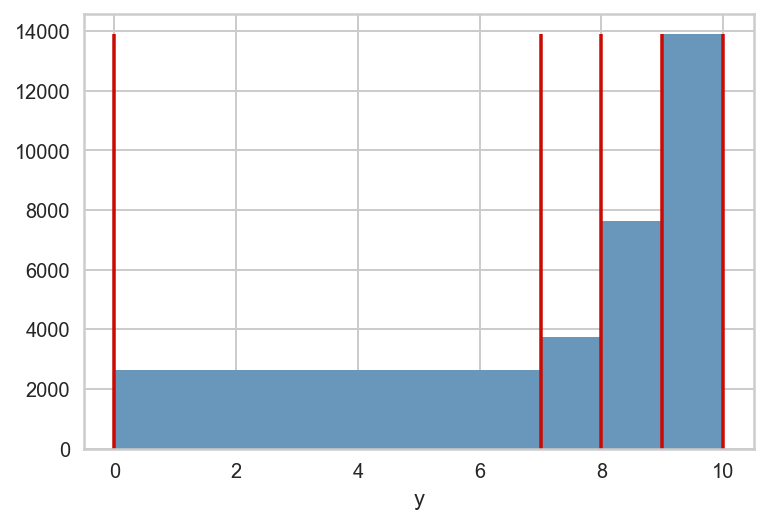

In [9]:
from yellowbrick.datasets import load_concrete
from yellowbrick.target import BalancedBinningReference


# Instantiate the visualizer
visualizer = BalancedBinningReference(bins=[0,7,8,9,10])

y = df['RATINGHS']
visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [10]:

LABEL_MAP = {
    1: "Un-Satisfied",
    2: "Un-Satisfied",
    3: "Un-Satisfied",
    4: "Un-Satisfied",
    5: "Un-Satisfied",
    6: "Un-Satisfied",
    7: "Satisfied",
    8: "Satisfied",
    9: "Highly Satisfied",
    10: "Extreme Satisfied"
}

# Convert class labels into text
df['RATINGHS'] = df['RATINGHS'].map(LABEL_MAP)


In [11]:
df['RATINGHS']

0        Extreme Satisfied
1                Satisfied
2         Highly Satisfied
3                Satisfied
4        Extreme Satisfied
5         Highly Satisfied
6             Un-Satisfied
7                Satisfied
8             Un-Satisfied
9             Un-Satisfied
10               Satisfied
11               Satisfied
12               Satisfied
13        Highly Satisfied
14       Extreme Satisfied
15        Highly Satisfied
16               Satisfied
17        Highly Satisfied
18               Satisfied
19               Satisfied
20               Satisfied
21       Extreme Satisfied
22       Extreme Satisfied
23               Satisfied
24               Satisfied
25        Highly Satisfied
26       Extreme Satisfied
27               Satisfied
28       Extreme Satisfied
29               Satisfied
               ...        
27884            Satisfied
27885            Satisfied
27886    Extreme Satisfied
27887     Highly Satisfied
27888            Satisfied
27889     Highly Satisfied
2

### Class Balance

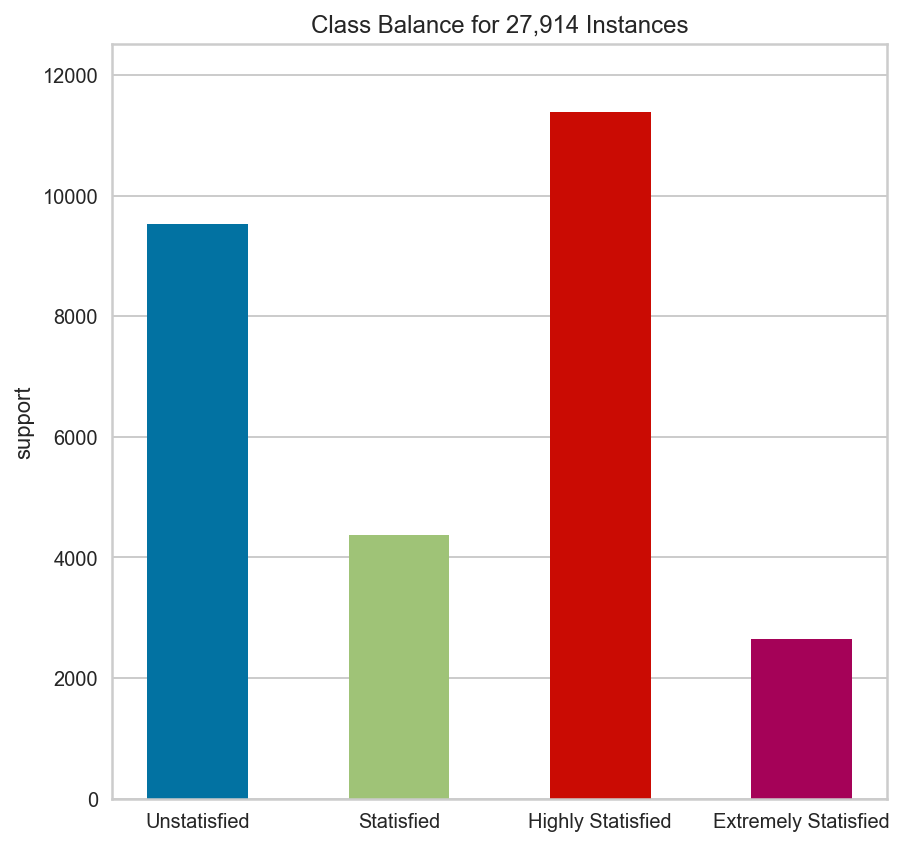

In [51]:
from yellowbrick.target import ClassBalance

# Load multi-class classification dataset
X = df[features]
y = df['RATINGHS']

# Instantiate the visualizer
visualizer = ClassBalance(
    labels=["Unstatisfied", "Statisfied", "Highly Statisfied", "Extremely Statisfied"], size=(500, 500)
)

visualizer.fit(y)
visualizer.show()

### Random Forest Classifer - Feature Importances

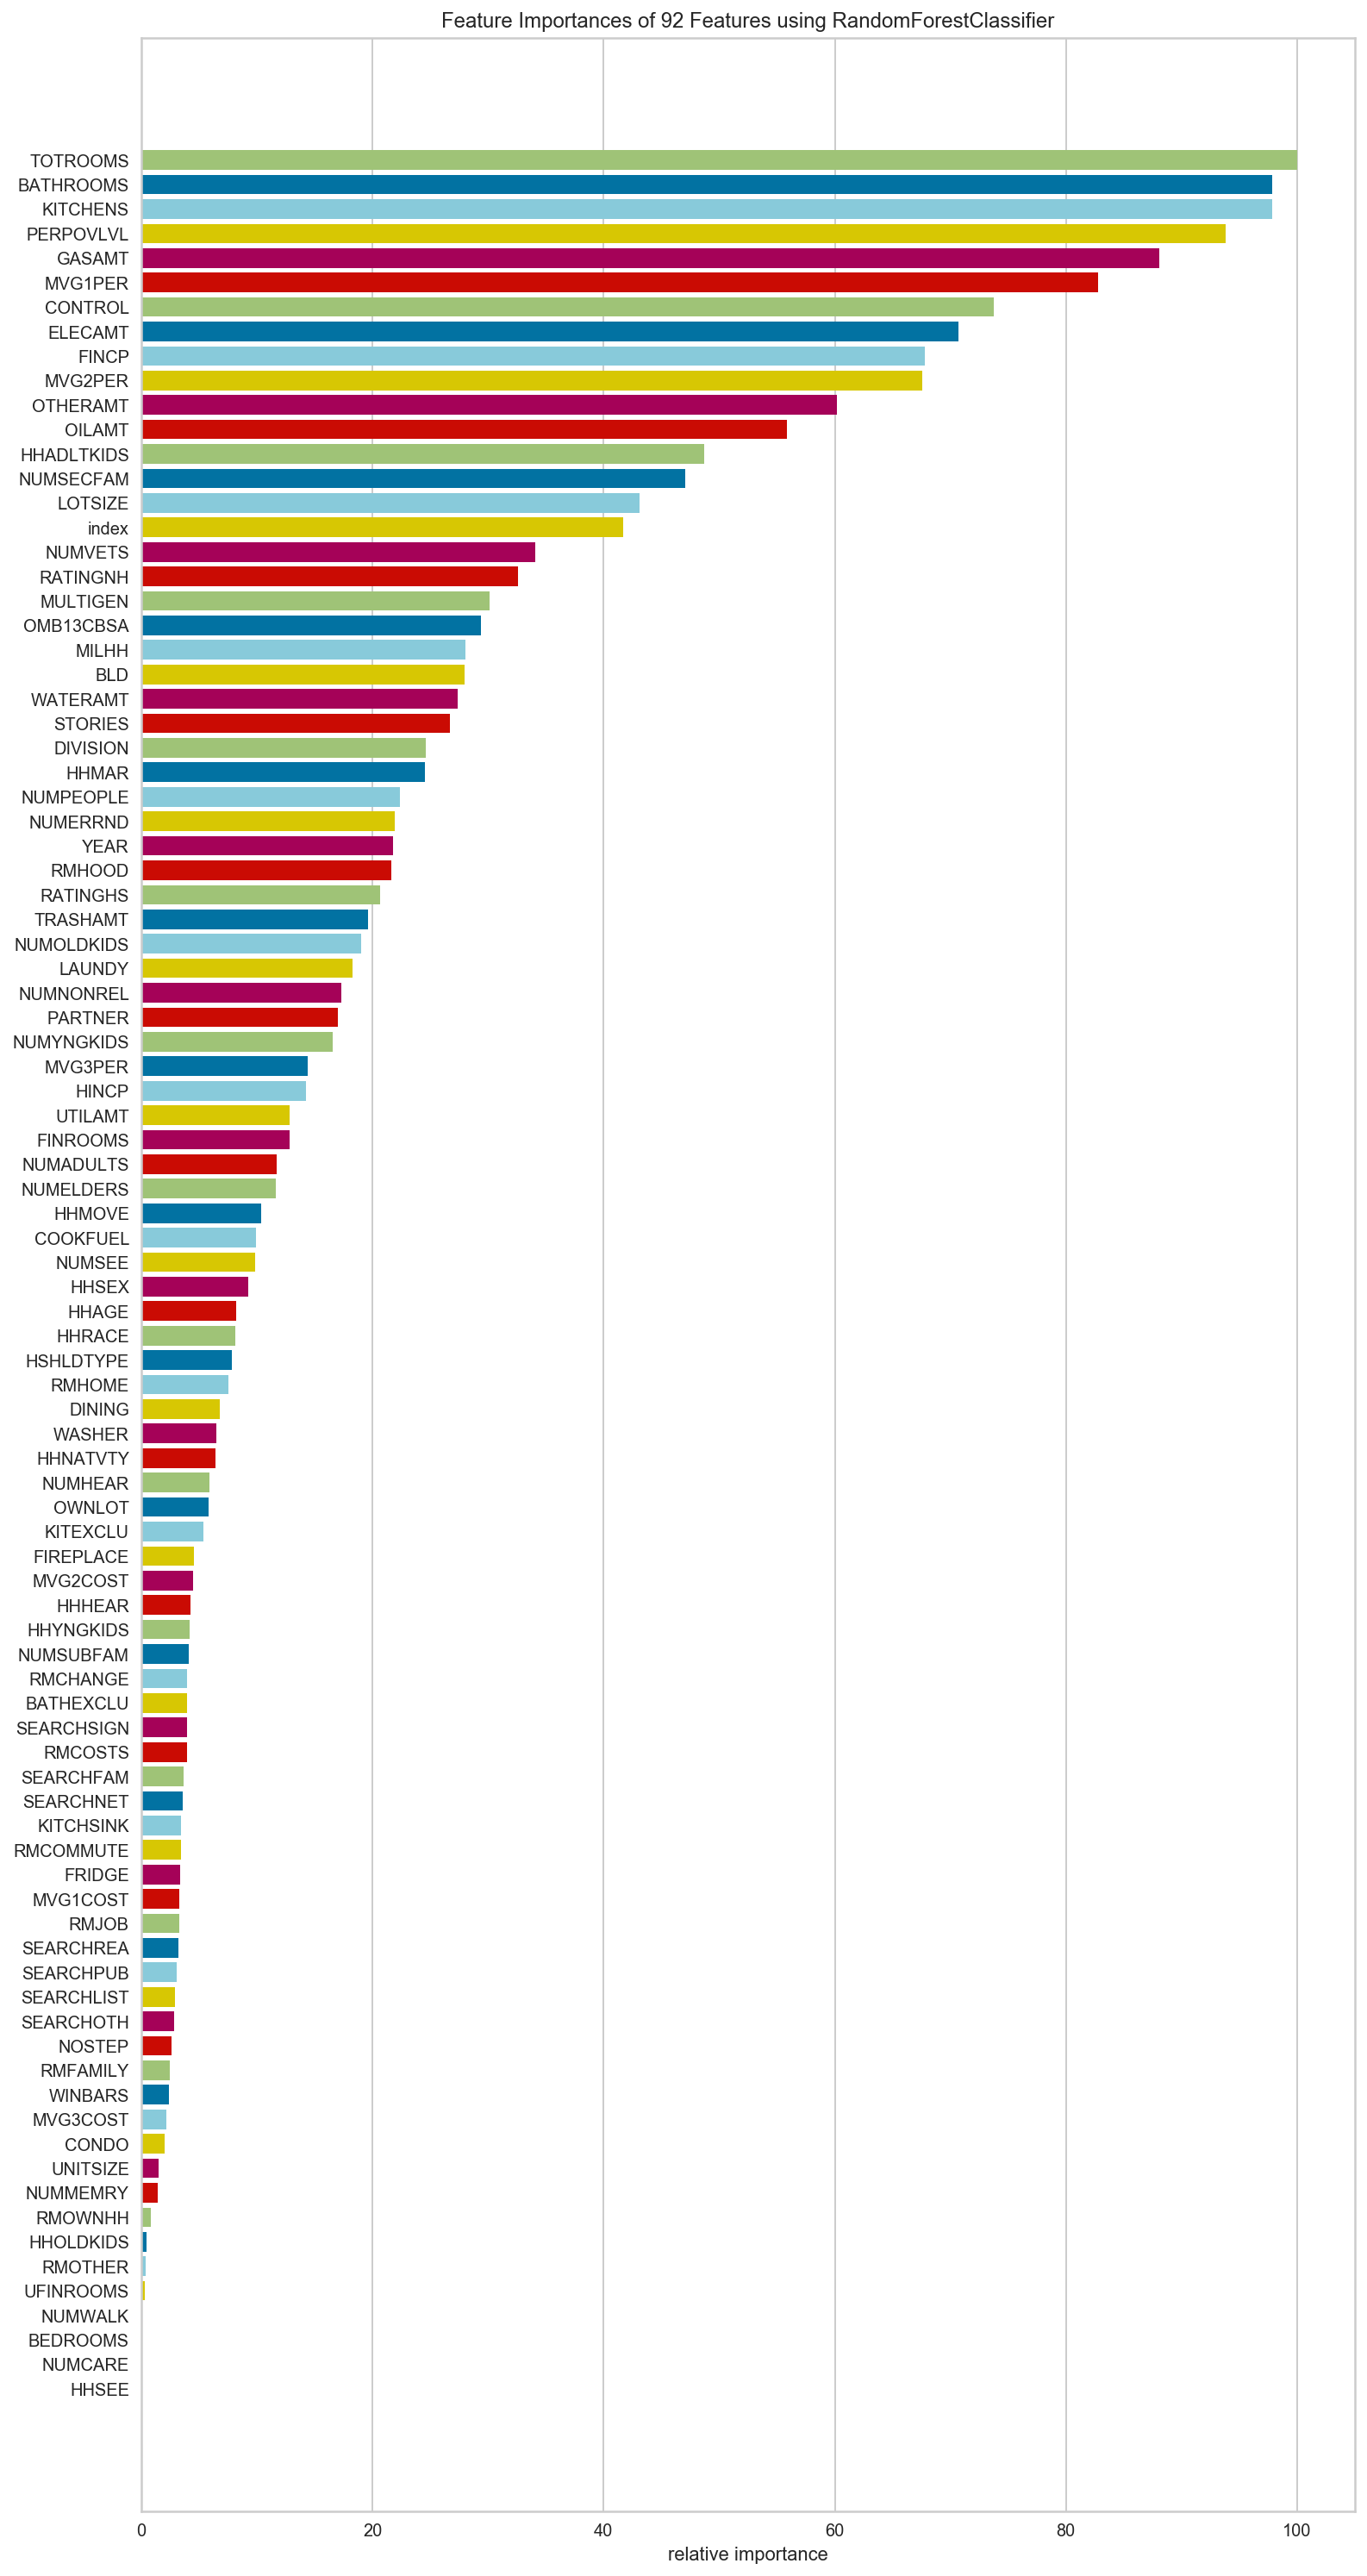

In [28]:
#Using Randomforest classifier
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features import FeatureImportances

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model, size=(800, 1500), labels=df.columns)

viz.fit(X, y)
viz.show()

### RadViz

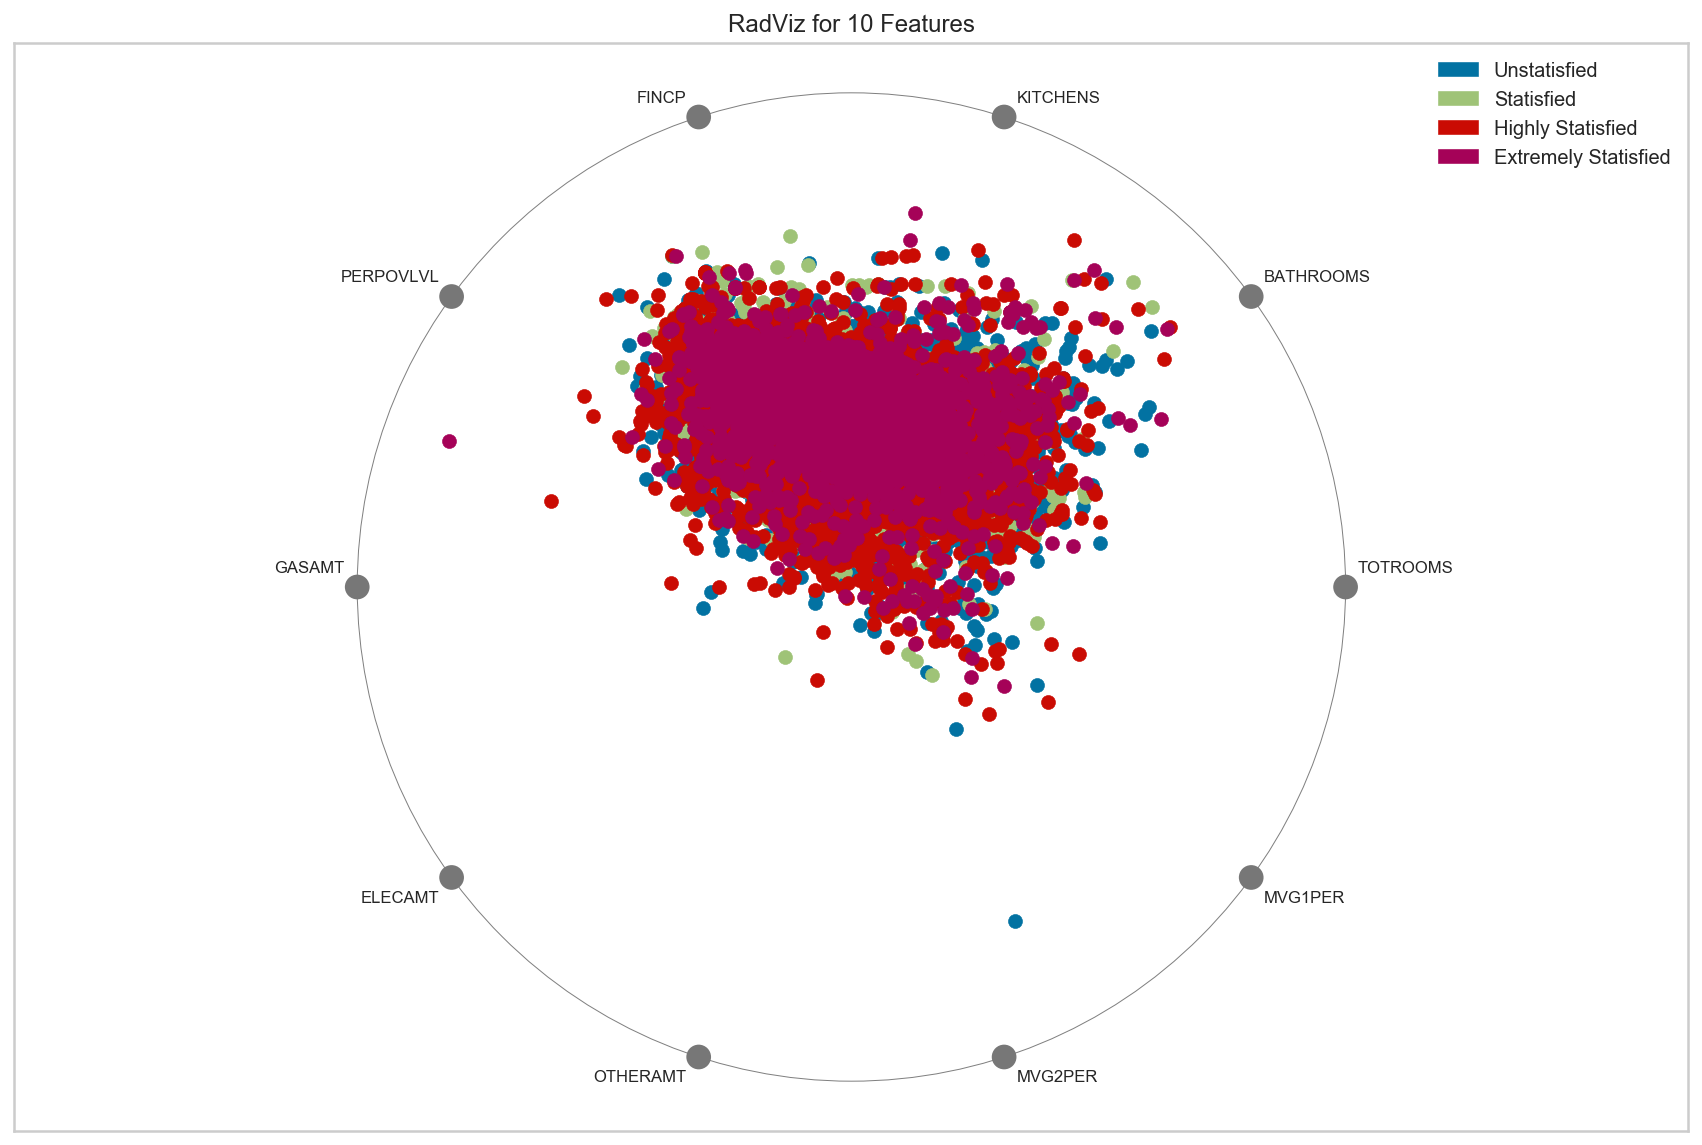

array([[ 5.,  3.,  1., ...,  0., -6.,  5.],
       [ 6.,  2.,  1., ...,  0., -6., -6.],
       [ 7.,  4.,  1., ...,  0., -6.,  2.],
       ...,
       [ 6.,  3.,  1., ...,  0., -6., -6.],
       [ 4.,  1.,  1., ...,  0., -6., -6.],
       [ 5.,  3.,  1., ...,  0., -6., -6.]])

In [49]:
#top 10 features from feature importances - random classifer 

from sklearn.preprocessing import LabelEncoder

X = df[['TOTROOMS','BATHROOMS','KITCHENS','FINCP','PERPOVLVL','GASAMT','ELECAMT','OTHERAMT','MVG2PER', 'MVG1PER']].values
y = df['RATINGHS'].values

# Encode our target variable
y = LabelEncoder().fit_transform(y)

# Specify the target classes
classes = ["Unstatisfied", "Statisfied", "Highly Statisfied", "Extremely Statisfied"]
features = ['TOTROOMS','BATHROOMS','KITCHENS','FINCP','PERPOVLVL','GASAMT','ELECAMT','OTHERAMT','MVG2PER', 'MVG1PER']

# Instantiate the visualizer
visualizer = RadViz(size=(1080, 720), 
                    classes=classes, 
                    features=features)

visualizer.fit_transform_show(X, y)

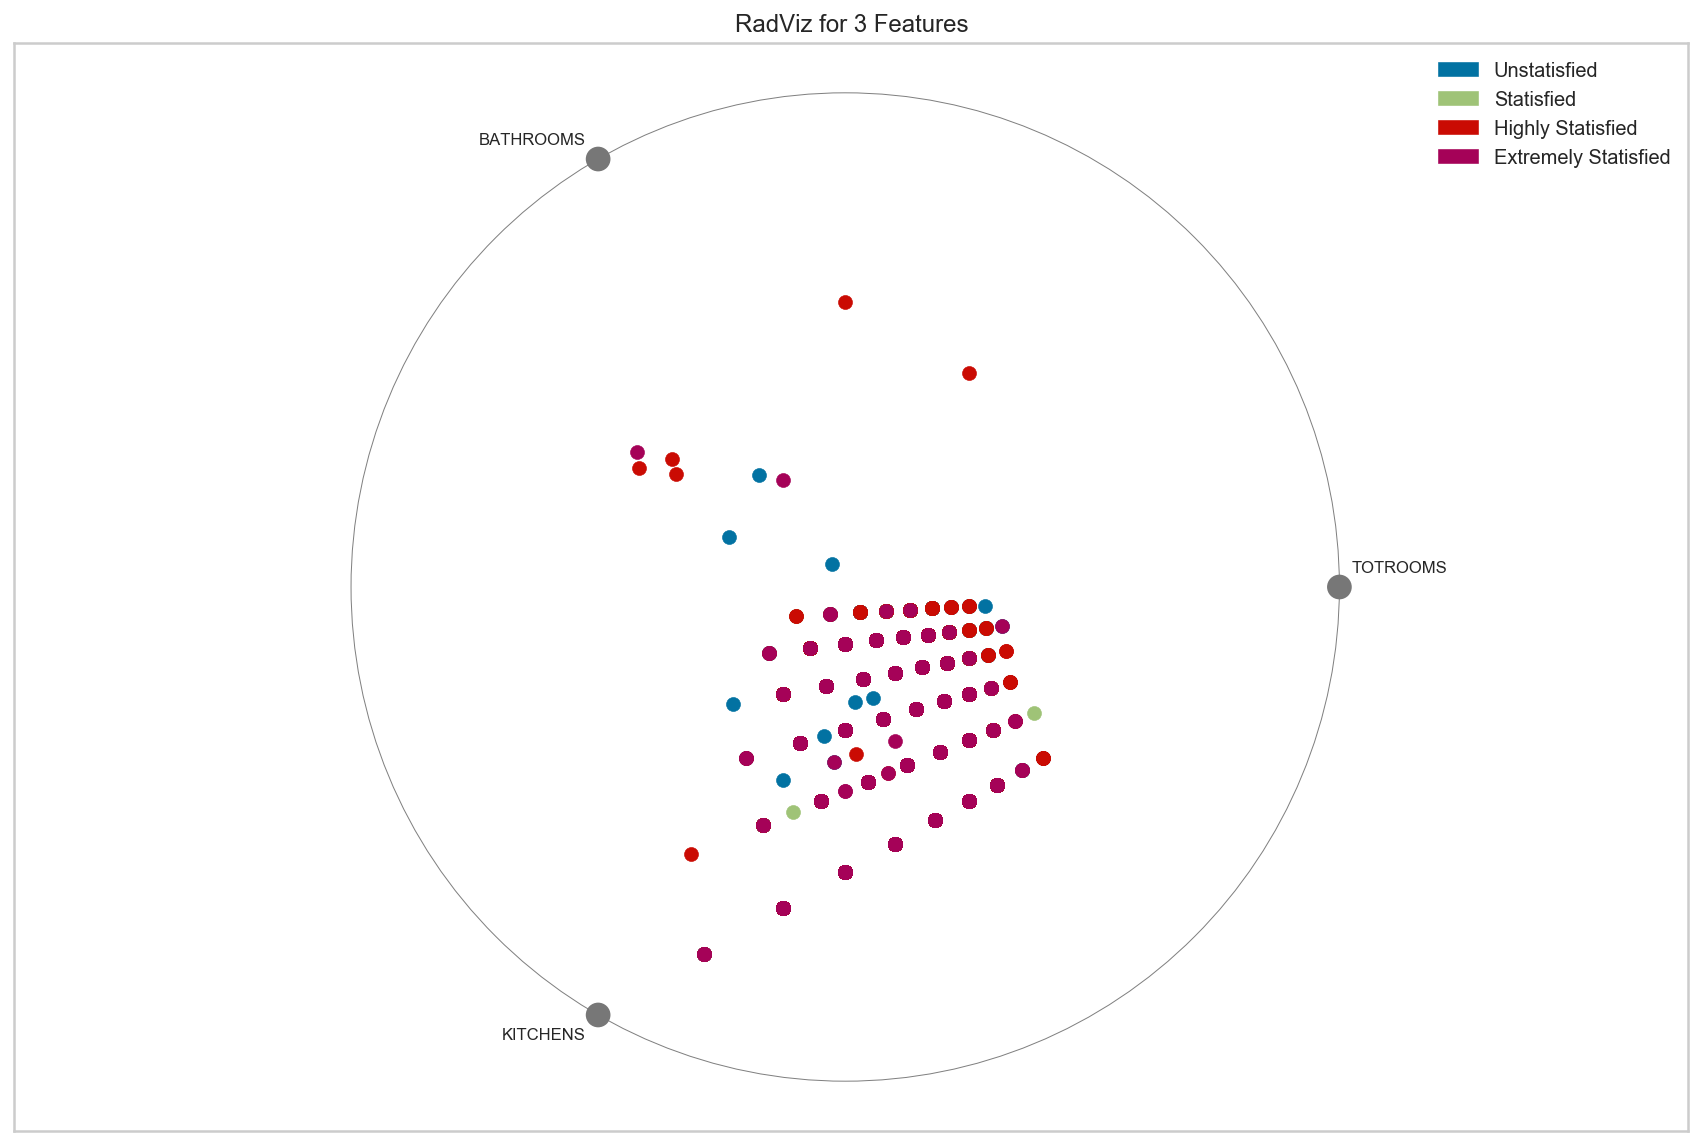

array([[5., 3., 1.],
       [6., 2., 1.],
       [7., 4., 1.],
       ...,
       [6., 3., 1.],
       [4., 1., 1.],
       [5., 3., 1.]])

In [50]:
# top 10 - household characteristics

X = df[['TOTROOMS','BATHROOMS','KITCHENS']].values
y = df['RATINGHS'].values

y = LabelEncoder().fit_transform(y)

classes = ["Unstatisfied", "Statisfied", "Highly Statisfied", "Extremely Statisfied"]
features = ['TOTROOMS','BATHROOMS','KITCHENS']

# Instantiate the visualizer
visualizer = RadViz(size=(1080, 720), 
                    classes=classes, 
                    features=features)

visualizer.fit_transform_show(X, y)


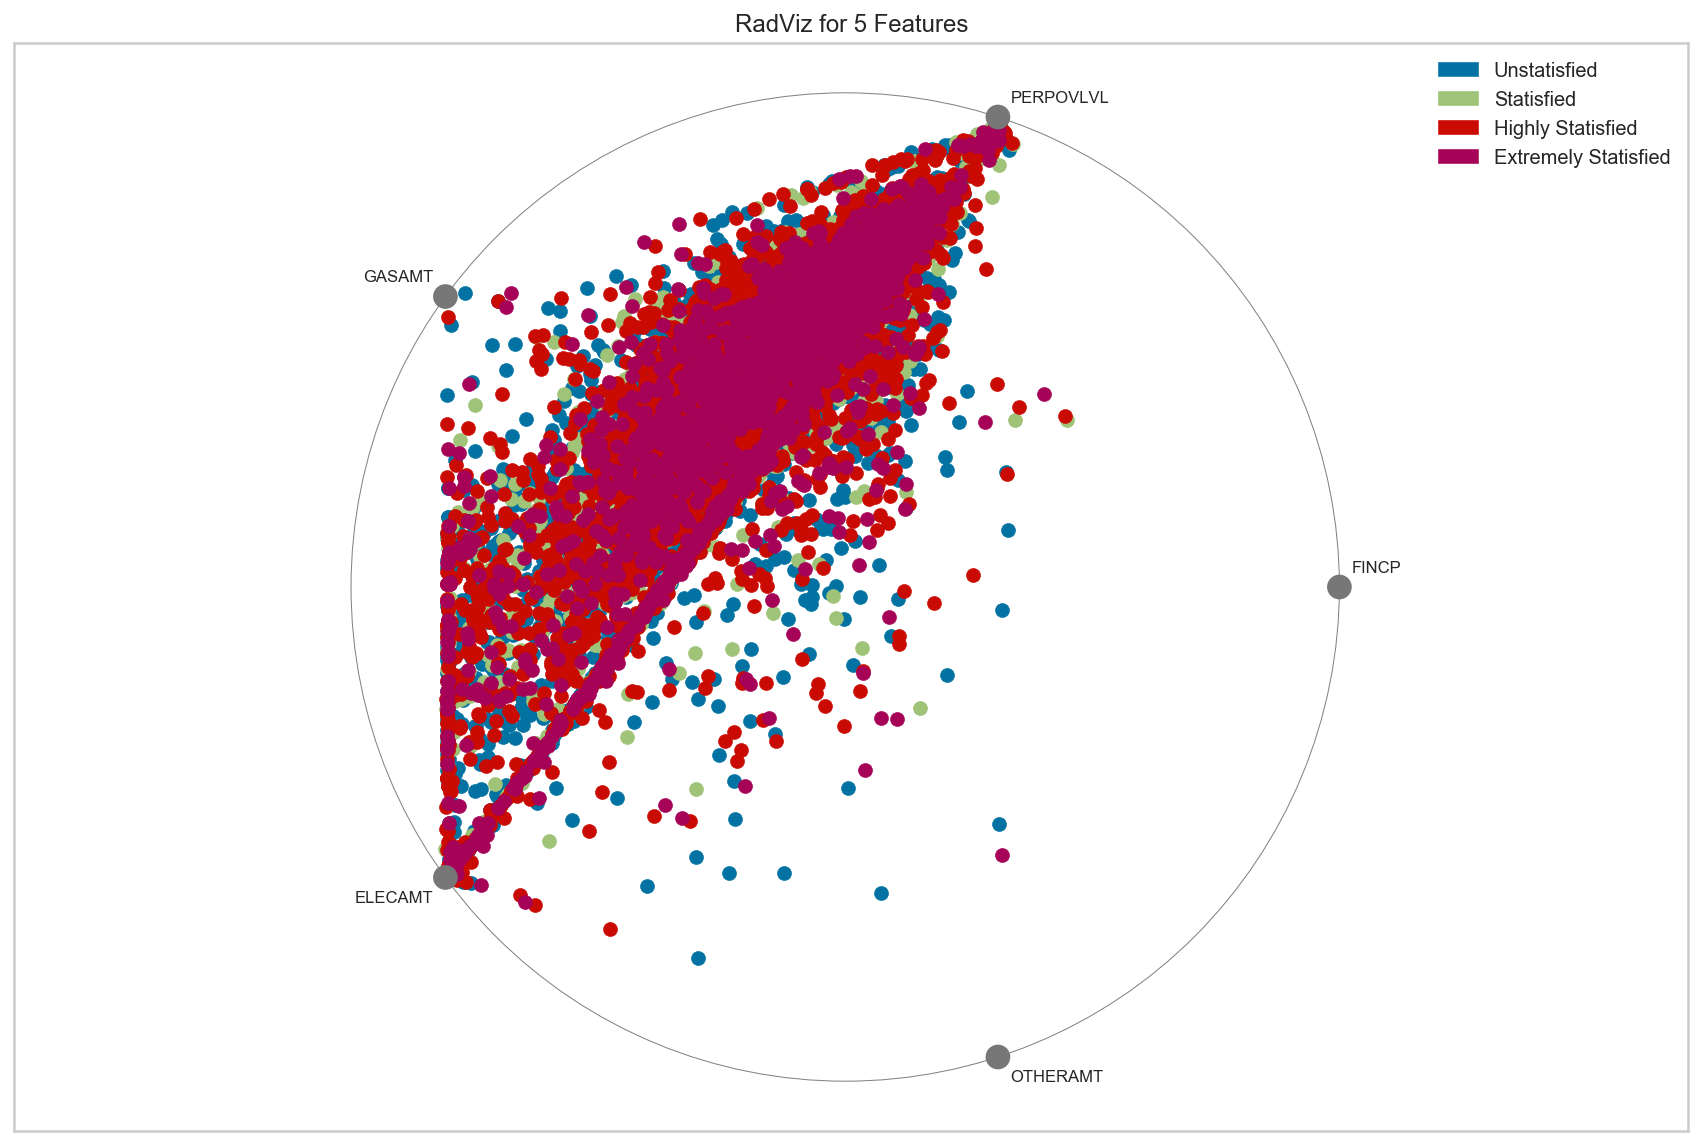

array([[5.87e+04, 3.61e+02, 3.00e+01, 1.20e+02, 0.00e+00],
       [1.26e+05, 5.01e+02, 0.00e+00, 1.60e+02, 0.00e+00],
       [1.30e+05, 5.01e+02, 9.00e+01, 9.00e+01, 0.00e+00],
       ...,
       [9.00e+04, 4.72e+02, 0.00e+00, 2.00e+02, 0.00e+00],
       [2.00e+03, 1.80e+01, 0.00e+00, 8.00e+01, 0.00e+00],
       [1.80e+04, 7.30e+01, 8.00e+01, 8.00e+01, 0.00e+00]])

In [44]:
#top 10 - expenses

X = df[['FINCP','PERPOVLVL','GASAMT','ELECAMT','OTHERAMT']].values
y = df['RATINGHS'].values

y = LabelEncoder().fit_transform(y)

# Specify the target classes
classes = ["Unstatisfied", "Statisfied", "Highly Statisfied", "Extremely Statisfied"]
features = ['FINCP','PERPOVLVL','GASAMT','ELECAMT','OTHERAMT']

# Instantiate the visualizer
visualizer = RadViz(size=(1080, 720), 
                    classes=classes, 
                    features=features)

visualizer.fit_transform_show(X, y)
       

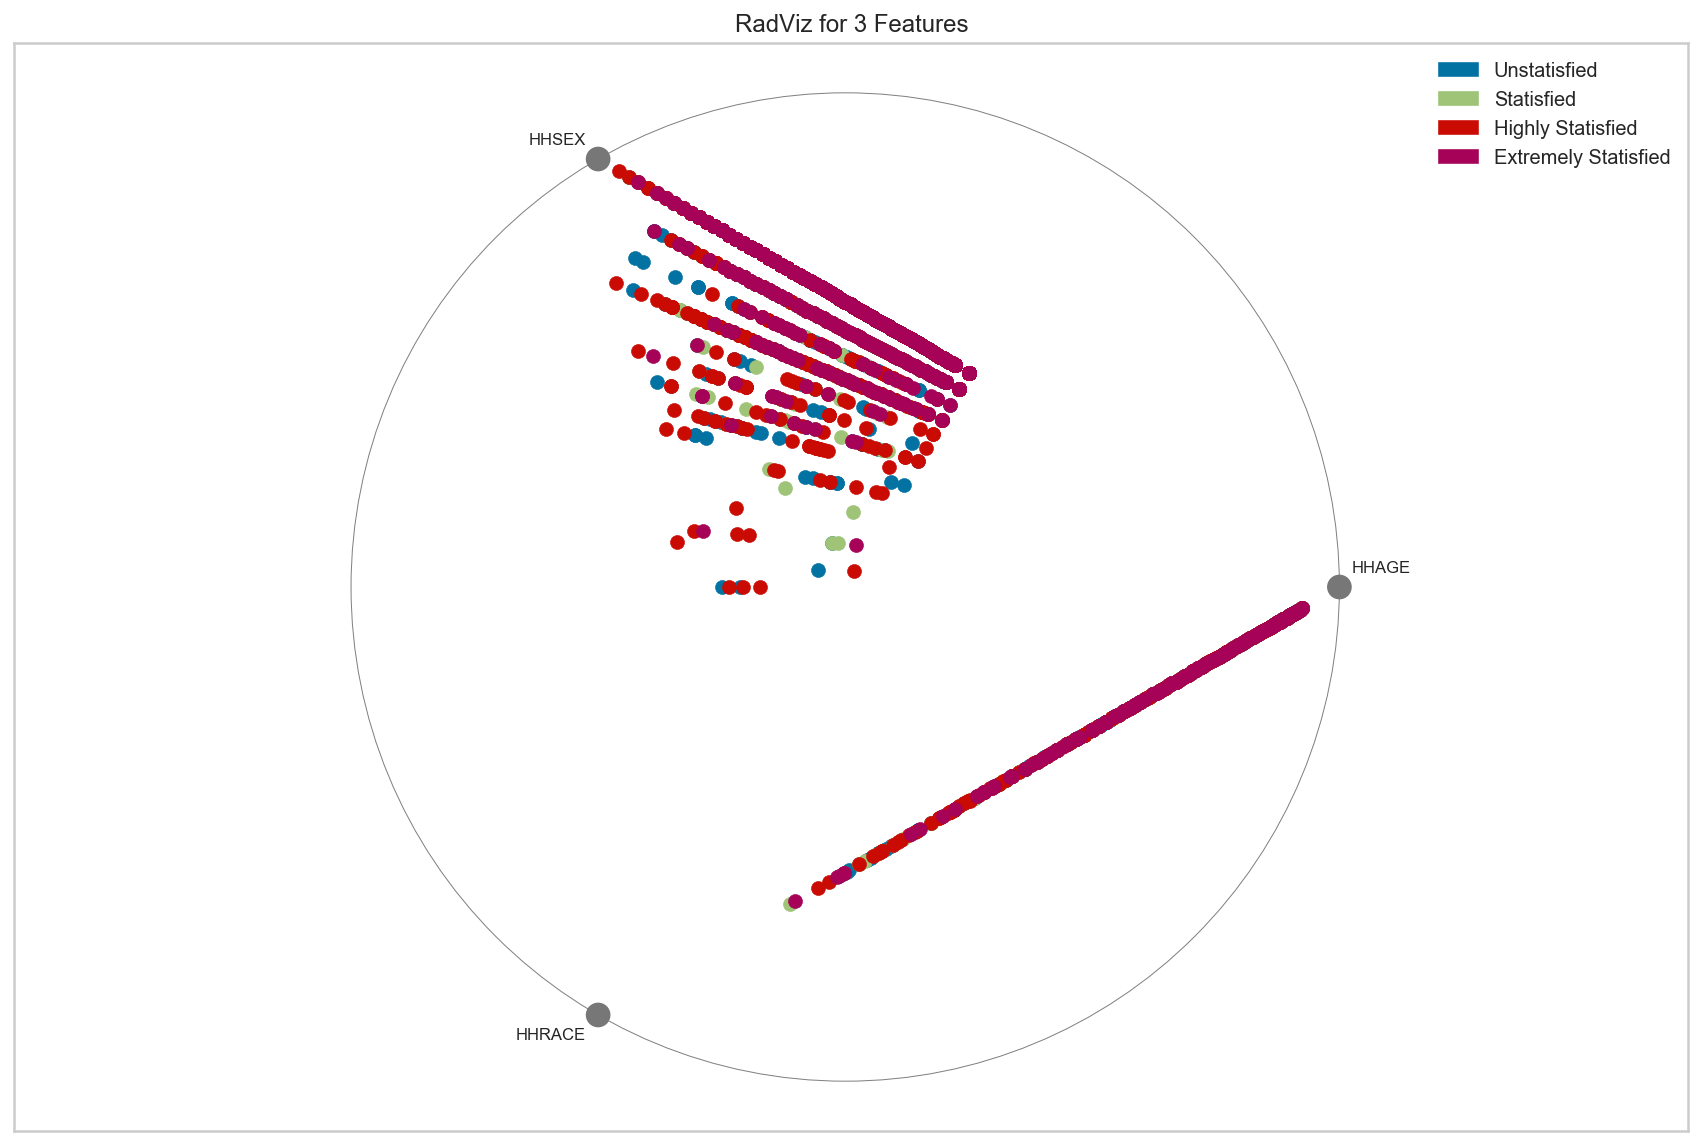

array([[64.,  2.,  1.],
       [38.,  2.,  1.],
       [43.,  2.,  1.],
       ...,
       [37.,  1.,  1.],
       [85.,  1.,  1.],
       [41.,  1.,  3.]])

In [45]:
#household demographic

X = df[['HHAGE','HHSEX','HHRACE']].values
y = df['RATINGHS'].values

y = LabelEncoder().fit_transform(y)

# Specify the target classes
classes = ["Unstatisfied", "Statisfied", "Highly Statisfied", "Extremely Statisfied"]
features = ['HHAGE','HHSEX','HHRACE']

# Instantiate the visualizer
visualizer = RadViz(size=(1080, 720), 
                    classes=classes, 
                    features=features)

visualizer.fit_transform_show(X, y)
       

### Parallel Coordinates

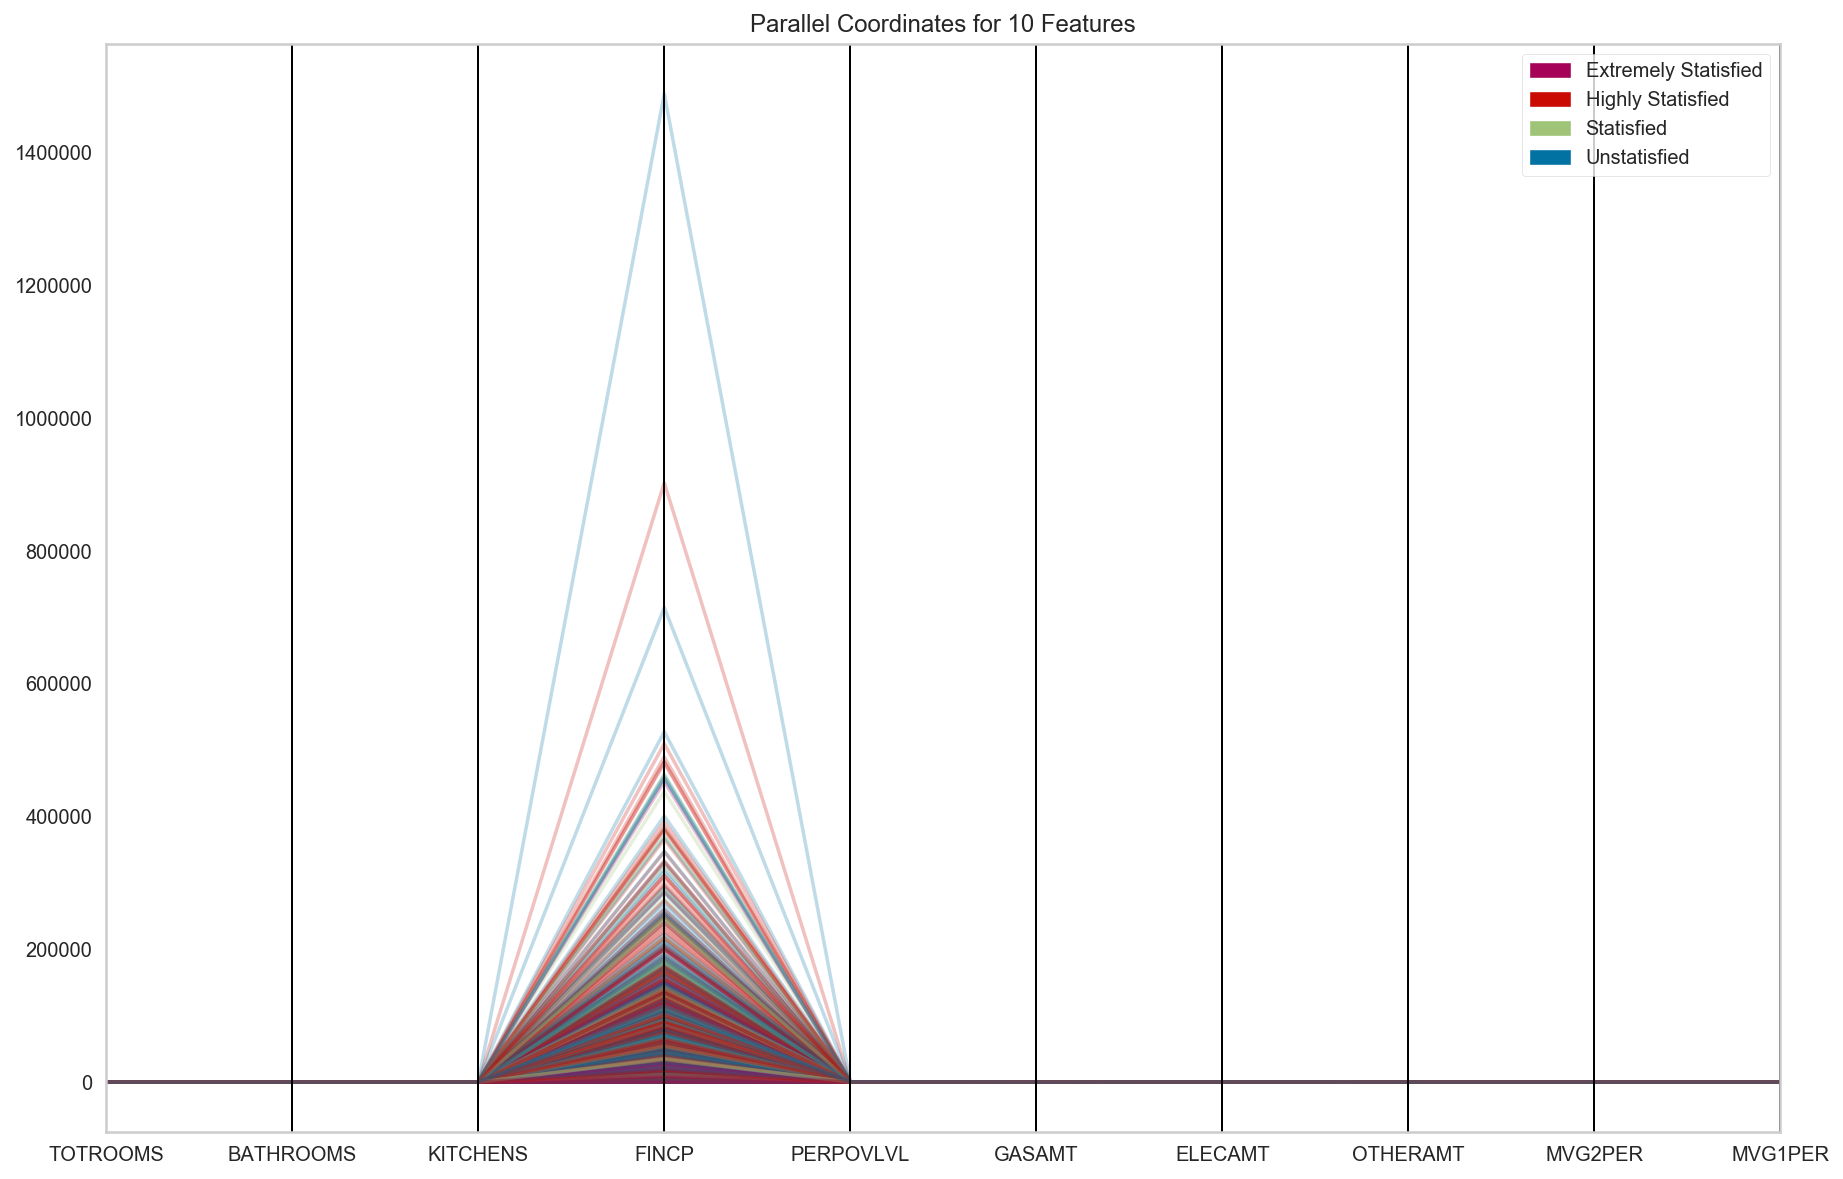

array([[ 5.,  3.,  1., ...,  0., -6.,  5.],
       [ 6.,  2.,  1., ...,  0., -6., -6.],
       [ 7.,  4.,  1., ...,  0., -6.,  2.],
       ...,
       [ 6.,  3.,  1., ...,  0., -6., -6.],
       [ 4.,  1.,  1., ...,  0., -6., -6.],
       [ 5.,  3.,  1., ...,  0., -6., -6.]])

In [55]:
from yellowbrick.features import ParallelCoordinates

X = df[['TOTROOMS','BATHROOMS','KITCHENS','FINCP','PERPOVLVL','GASAMT','ELECAMT','OTHERAMT','MVG2PER', 'MVG1PER']].values
y = df['RATINGHS'].values

y = LabelEncoder().fit_transform(y)

# Specify the features of interest and the classes of the target
features = ['TOTROOMS','BATHROOMS','KITCHENS','FINCP','PERPOVLVL','GASAMT','ELECAMT','OTHERAMT','MVG2PER', 'MVG1PER']
classes = ["Unstatisfied", "Statisfied", "Highly Statisfied", "Extremely Statisfied"]

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features, sample=0.05, 
    shuffle=True, size=(1080, 720)
)

# Fit and transform the data to the visualizer
visualizer.fit_transform_show(X, y)

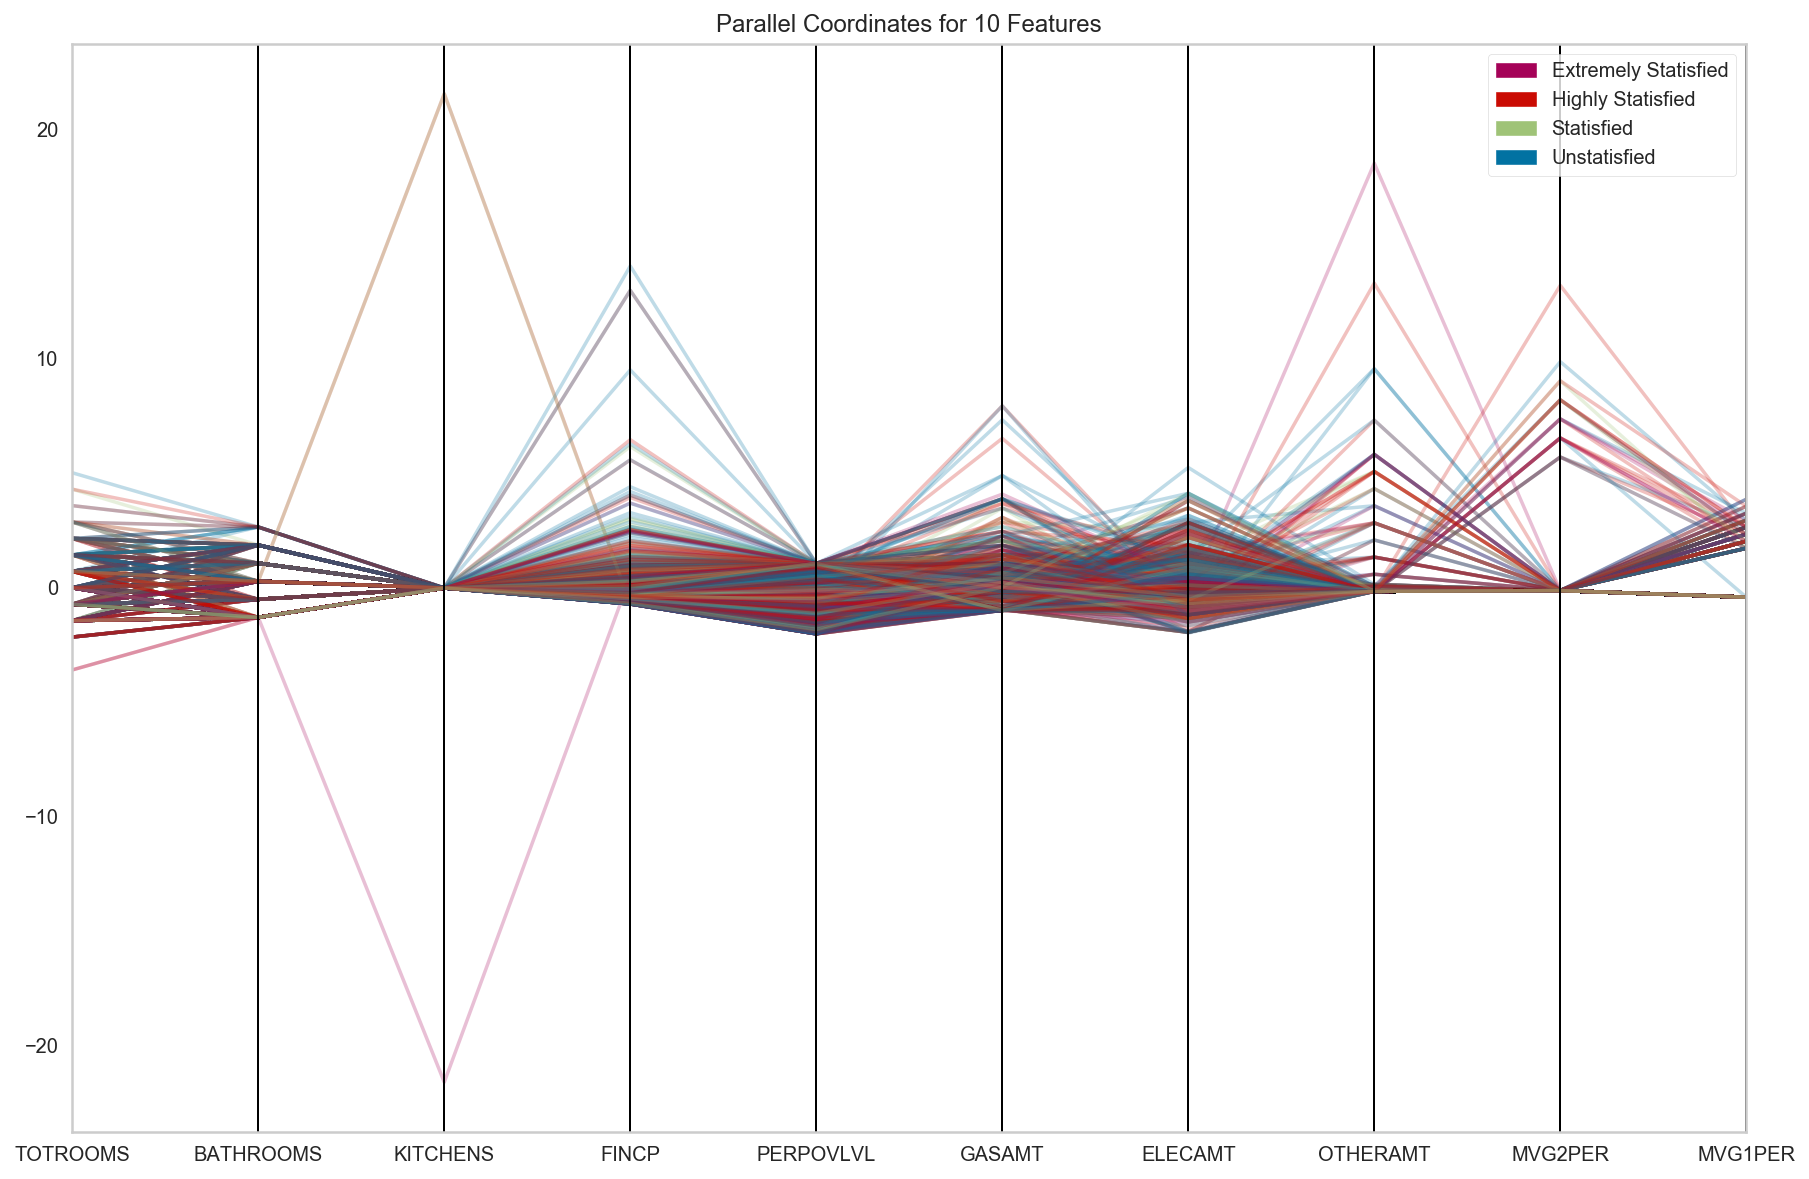

array([[ 5.,  3.,  1., ...,  0., -6.,  5.],
       [ 6.,  2.,  1., ...,  0., -6., -6.],
       [ 7.,  4.,  1., ...,  0., -6.,  2.],
       ...,
       [ 6.,  3.,  1., ...,  0., -6., -6.],
       [ 4.,  1.,  1., ...,  0., -6., -6.],
       [ 5.,  3.,  1., ...,  0., -6., -6.]])

In [56]:
#normalized

X = df[['TOTROOMS','BATHROOMS','KITCHENS','FINCP','PERPOVLVL','GASAMT','ELECAMT','OTHERAMT','MVG2PER', 'MVG1PER']].values
y = df['RATINGHS'].values

y = LabelEncoder().fit_transform(y)

# Specify the features of interest and the classes of the target
features = ['TOTROOMS','BATHROOMS','KITCHENS','FINCP','PERPOVLVL','GASAMT','ELECAMT','OTHERAMT','MVG2PER', 'MVG1PER']
classes = ["Unstatisfied", "Statisfied", "Highly Statisfied", "Extremely Statisfied"]

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features, normalize='standard', sample=0.05, 
    shuffle=True, size=(1080, 720)
)

# Fit and transform the data to the visualizer
visualizer.fit_transform_show(X, y)

### Rank 2D

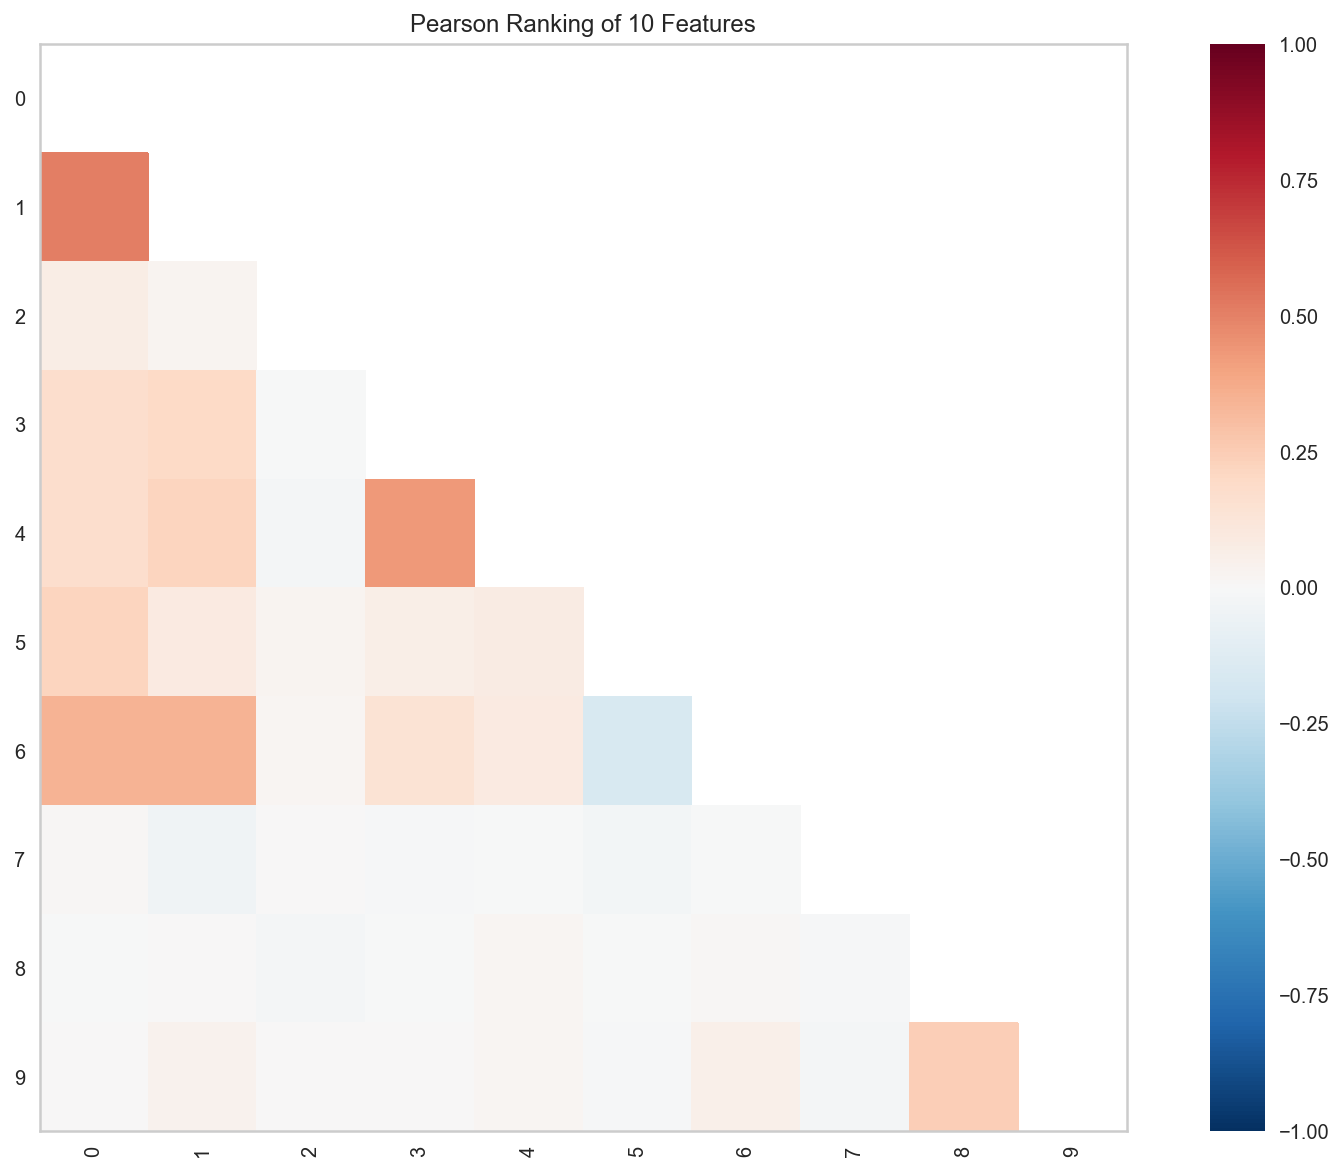

array([[ 5.,  3.,  1., ...,  0., -6.,  5.],
       [ 6.,  2.,  1., ...,  0., -6., -6.],
       [ 7.,  4.,  1., ...,  0., -6.,  2.],
       ...,
       [ 6.,  3.,  1., ...,  0., -6., -6.],
       [ 4.,  1.,  1., ...,  0., -6., -6.],
       [ 5.,  3.,  1., ...,  0., -6., -6.]])

In [63]:
#top 10 features from feature importances

from yellowbrick.features import Rank2D


X = df[['TOTROOMS','BATHROOMS','KITCHENS','FINCP','PERPOVLVL','GASAMT','ELECAMT','OTHERAMT','MVG2PER', 'MVG1PER']].values
y = df['RATINGHS'].values

y = LabelEncoder().fit_transform(y)

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson', size=(1080, 720))

visualizer.fit_transform_show(X, y)

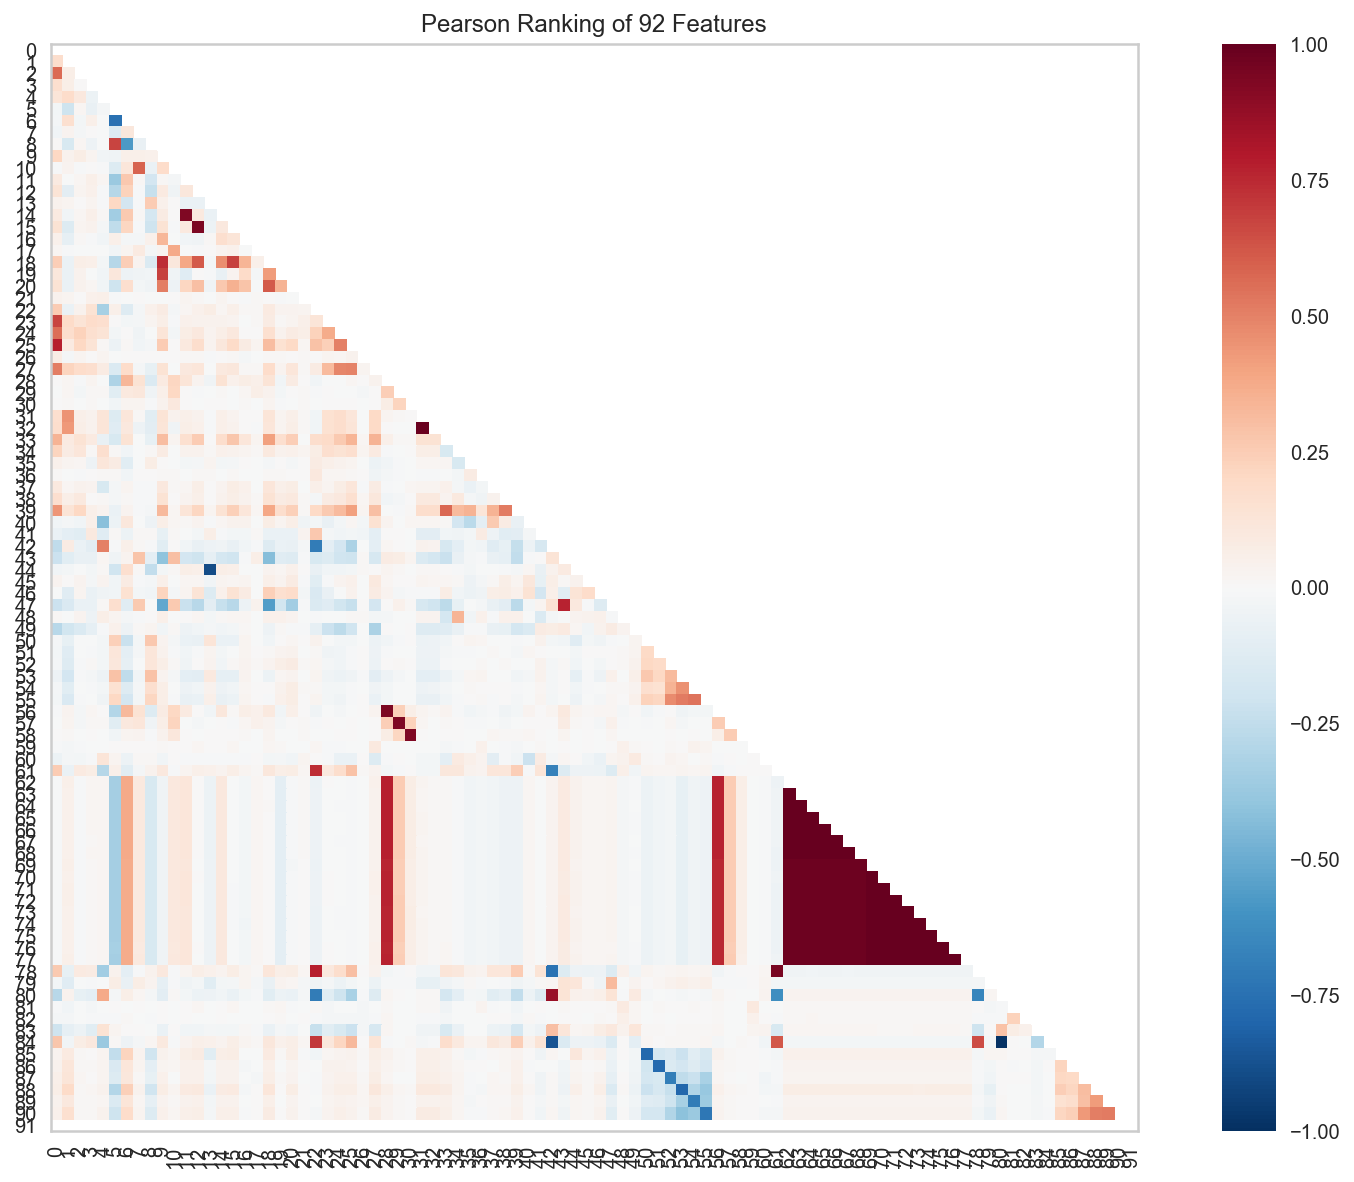

array([[  5., 361.,   0., ...,   2.,   2.,   1.],
       [  6., 501.,   1., ...,   2.,   2.,   1.],
       [  7., 501.,   1., ...,   2.,   2.,   1.],
       ...,
       [  6., 472.,   1., ...,   2.,   2.,   1.],
       [  4.,  18.,   0., ...,   1.,   1.,   1.],
       [  5.,  73.,   1., ...,   2.,   2.,   1.]])

In [70]:
#rank 2D on all features

X = df[['TOTROOMS',
       'PERPOVLVL', 'DINING', 'LAUNDY', 'STORIES', 'HHAGE', 'HHMOVE',
       'PARTNER', 'NUMELDERS', 'NUMADULTS', 'NUMNONREL', 'HHYNGKIDS',
       'HHOLDKIDS', 'NUMVETS', 'NUMYNGKIDS', 'NUMOLDKIDS', 'NUMSUBFAM',
       'NUMSECFAM', 'NUMPEOPLE', 'HHADLTKIDS', 'MULTIGEN', 'UFINROOMS',
       'LOTSIZE', 'FINROOMS', 'UNITSIZE', 'BEDROOMS', 'KITCHENS', 'BATHROOMS',
       'MVG1PER', 'MVG2PER', 'MVG3PER', 'HINCP', 'FINCP', 'ELECAMT', 'GASAMT',
       'OILAMT', 'OTHERAMT', 'TRASHAMT', 'WATERAMT', 'UTILAMT', 'DIVISION',
       'OMB13CBSA', 'BLD', 'HHMAR', 'MILHH', 'HHRACE', 'HHNATVTY', 'HSHLDTYPE',
       'COOKFUEL', 'FIREPLACE', 'NUMHEAR', 'NUMSEE', 'NUMMEMRY', 'NUMWALK',
       'NUMCARE', 'NUMERRND', 'MVG1COST', 'MVG2COST', 'MVG3COST', 'BATHEXCLU',
       'NOSTEP', 'CONDO', 'SEARCHFAM', 'SEARCHLIST', 'SEARCHNET', 'SEARCHOTH',
       'SEARCHPUB', 'SEARCHREA', 'SEARCHSIGN', 'RMCHANGE', 'RMCOMMUTE',
       'RMCOSTS', 'RMFAMILY', 'RMHOME', 'RMHOOD', 'RMJOB', 'RMOWNHH',
       'RMOTHER', 'OWNLOT', 'HHSEX', 'KITEXCLU', 'FRIDGE', 'KITCHSINK',
       'WASHER', 'WINBARS', 'HHHEAR', 'HHSEE', 'HHMEMRY', 'HHWALK', 'HHCARE',
       'HHERRND', 'FIRSTHOME']].values
y = df['RATINGHS'].values

y = LabelEncoder().fit_transform(y)

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson', size=(1080, 720))

visualizer.fit_transform_show(X, y)

### PCA Projection

In [ ]:
from yellowbrick.features.pca import PCADecomposition

X = df[['TOTROOMS','BATHROOMS','KITCHENS','FINCP','PERPOVLVL','GASAMT','ELECAMT','OTHERAMT','MVG2PER', 'MVG1PER']].values
y = df['RATINGHS'].values

y = LabelEncoder().fit_transform(y)
# Create a list of colors to assign to points in the plot
colors = np.array(['r' if yi else 'b' for yi in y])

visualizer = PCADecomposition(
    scale=True, color=colors, size=(1080, 720)
)
visualizer.fit_transform_show(X, y)

### Manifold

In [ ]:
from yellowbrick.features.manifold import Manifold

X = df[['TOTROOMS','BATHROOMS','KITCHENS','FINCP','PERPOVLVL','GASAMT','ELECAMT','OTHERAMT','MVG2PER', 'MVG1PER']].values
y = df['RATINGHS'].values

y = LabelEncoder().fit_transform(y)

visualizer = Manifold(
    manifold='isomap', n_neighbors=5, target='continuous', size=(1080, 720)
)

visualizer.fit_transform_show(X, y)
